# Examination - HOUSING
The code you hand in should be clear and concise with adequate comments. Use approproate headers in your code. 

I (Antonio) should be able to see your results without running the code, so run the whole script when you are done and then save so the results are visible. 
**Kernel > "Restart & Run All" > Save.**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

import joblib

# Data

In [2]:
 housing = pd.read_csv('housing.csv')

### Short EDA

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [6]:
housing.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [7]:
# Nominal data
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

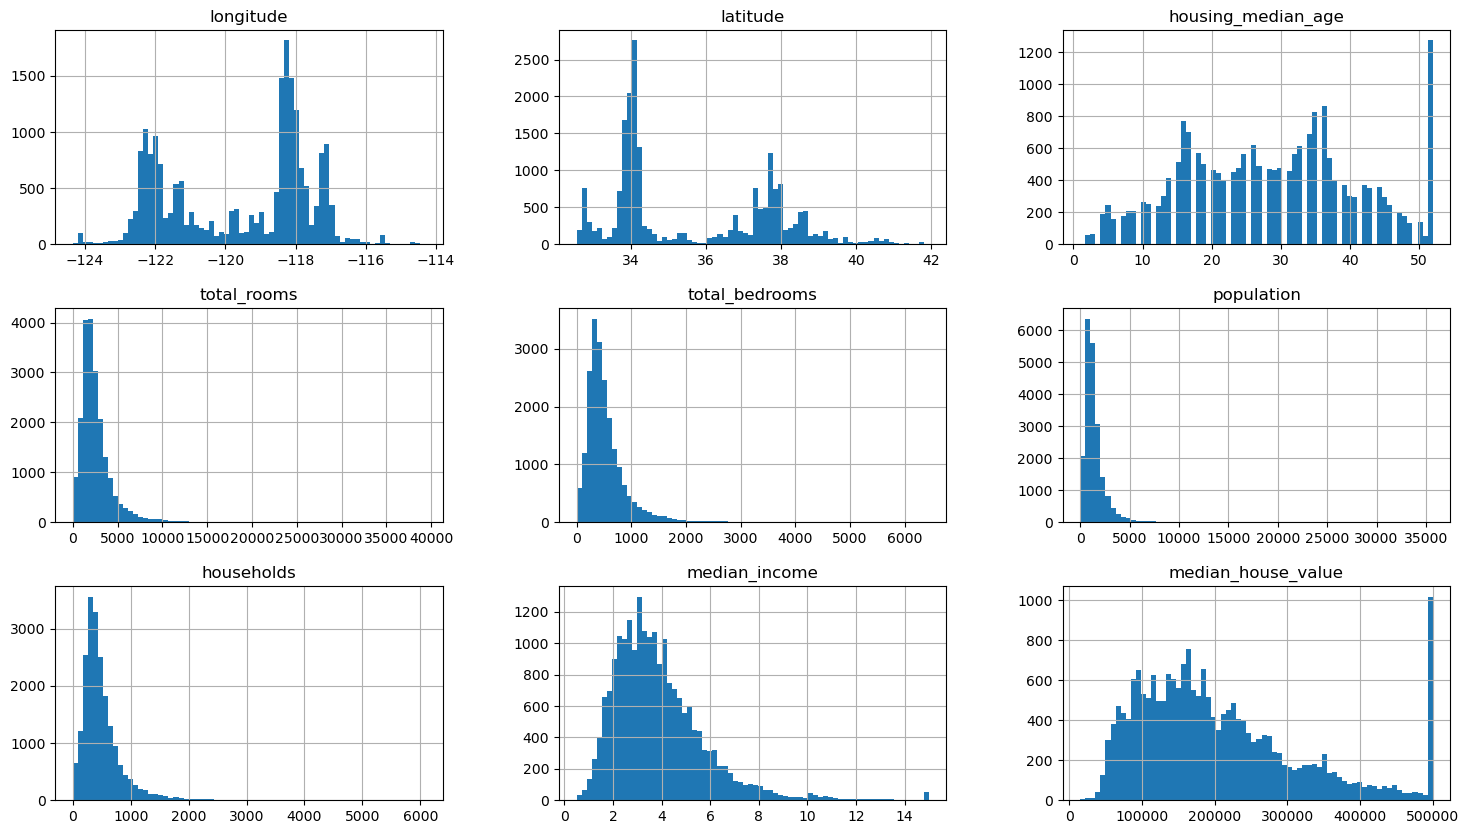

In [8]:
# Distribution av numeriska variabler
housing.hist(bins=70, figsize=(18, 10))
plt.show()

In [9]:
# Max värdet verkar vara det vanligaste hos median house value
print("mode:", housing['median_house_value'].mode())
print("max:", housing['median_house_value'].max())

mode: 0    500001.0
Name: median_house_value, dtype: float64
max: 500001.0


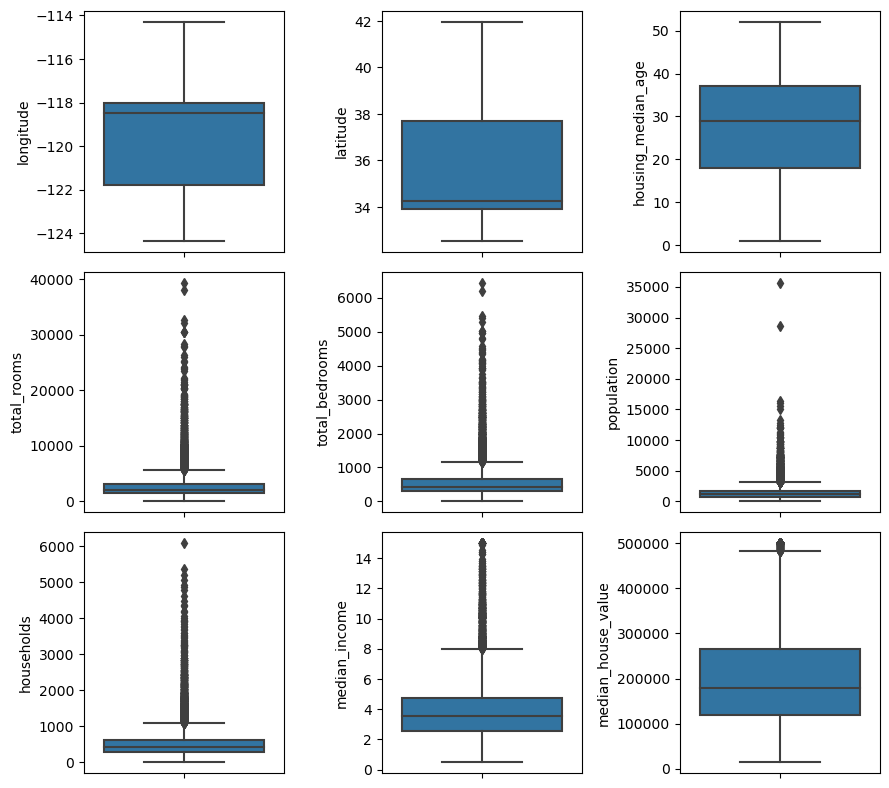

In [10]:
num_features = list(housing.drop('ocean_proximity', axis=1))

fig, ax = plt.subplots(3, 3, figsize=(9, 8))
ax = ax.flatten()

for i, column in enumerate(num_features):
    sns.boxplot(ax=ax[i], data=housing, y=column)
    
plt.tight_layout()
plt.show()

### Split into train and test set

In [11]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [12]:
# Train test split randomiserar även datan.
train_set.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
17848,-121.86,37.42,20.0,5032.0,808.0,2695.0,801.0,6.6227,264800.0,<1H OCEAN
6252,-117.97,34.04,28.0,1686.0,417.0,1355.0,388.0,2.5192,157300.0,<1H OCEAN
9389,-122.53,37.91,37.0,2524.0,398.0,999.0,417.0,7.9892,500001.0,NEAR BAY
6113,-117.90,34.13,5.0,1126.0,316.0,819.0,311.0,1.5000,139800.0,<1H OCEAN
6061,-117.79,34.02,5.0,18690.0,2862.0,9427.0,2777.0,6.4266,315600.0,<1H OCEAN


In [13]:
train_set['ocean_proximity'].value_counts()

<1H OCEAN     7341
INLAND        5227
NEAR OCEAN    2086
NEAR BAY      1854
ISLAND           4
Name: ocean_proximity, dtype: int64

## EDA

In [14]:
# Skapa en kopia av träningsdatan för EDA, för att kunna manipulera smidigt.
train_copy = train_set.copy()

<Axes: >

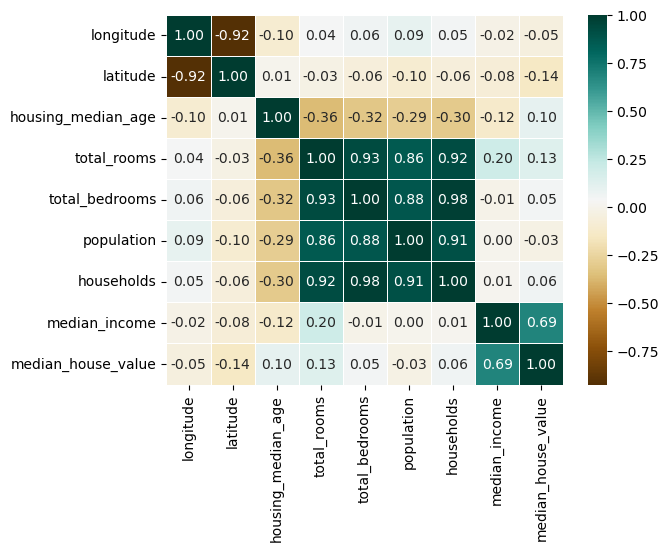

In [15]:
sns_Corr = train_copy.corr()
sns.heatmap(sns_Corr, annot=True, linewidth=.5, cmap = "BrBG", fmt=".2f")

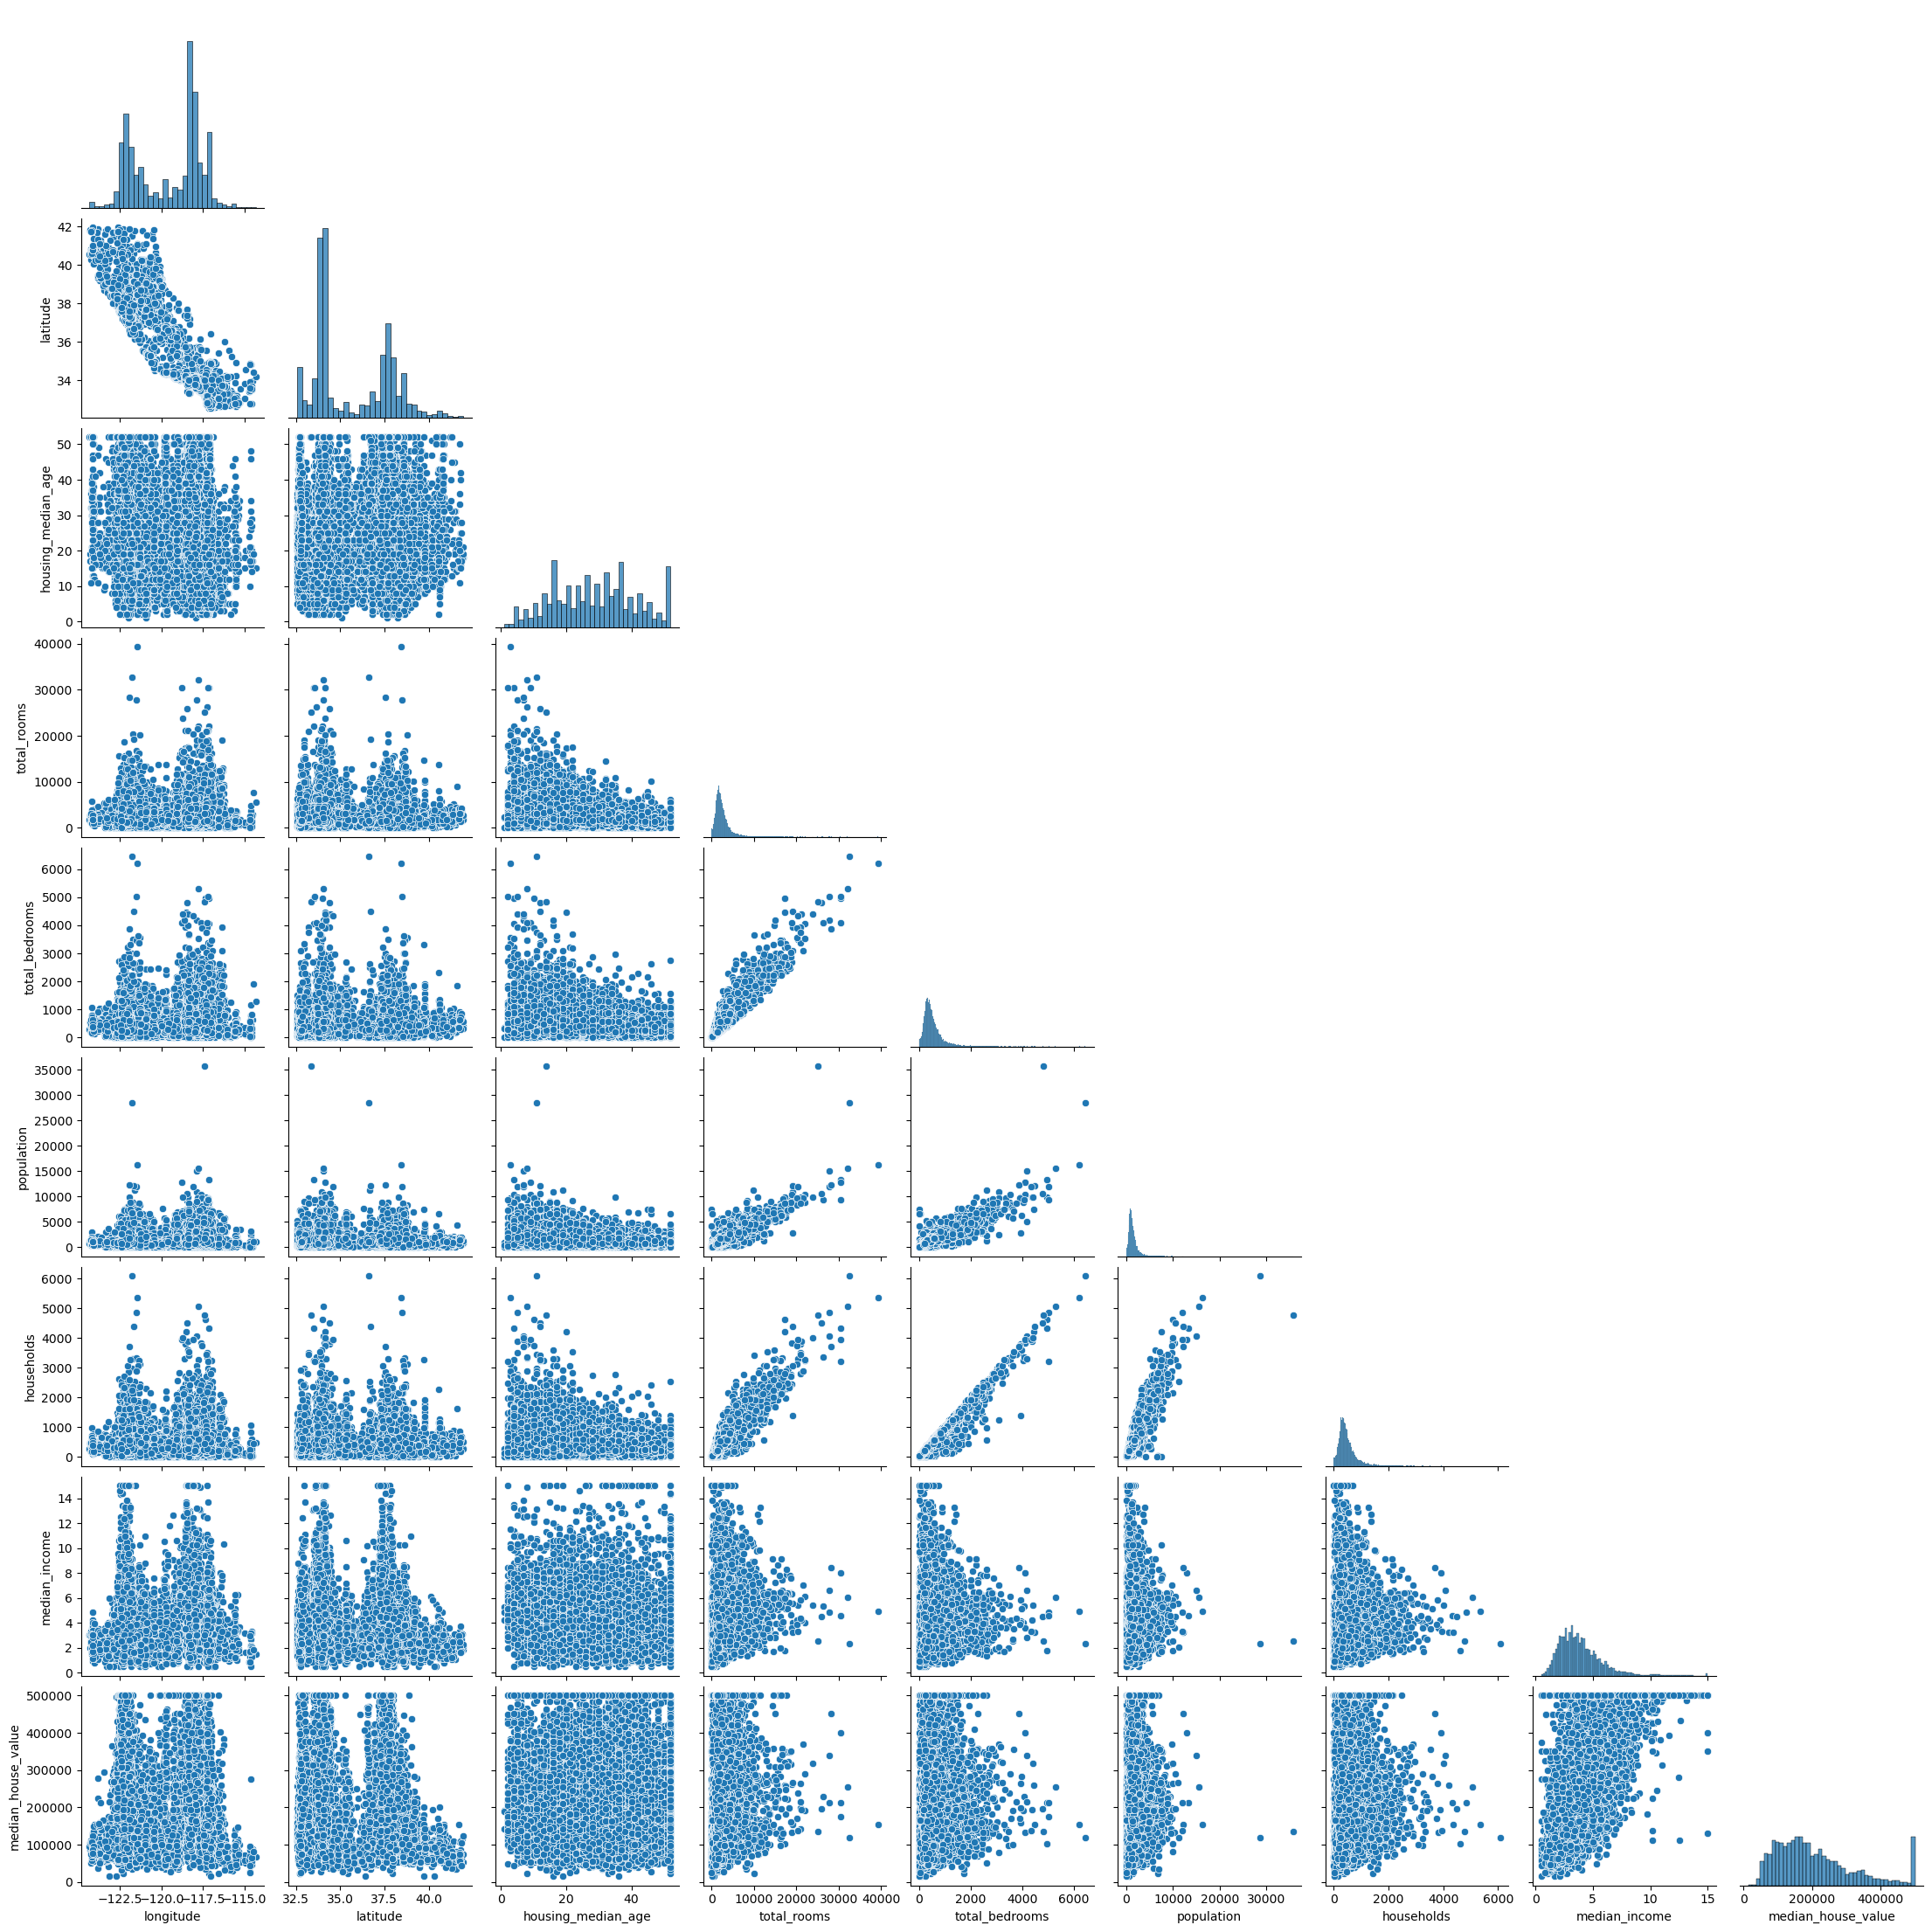

In [16]:
sns.pairplot(train_copy, corner=True)

<Axes: xlabel='median_income', ylabel='median_house_value'>

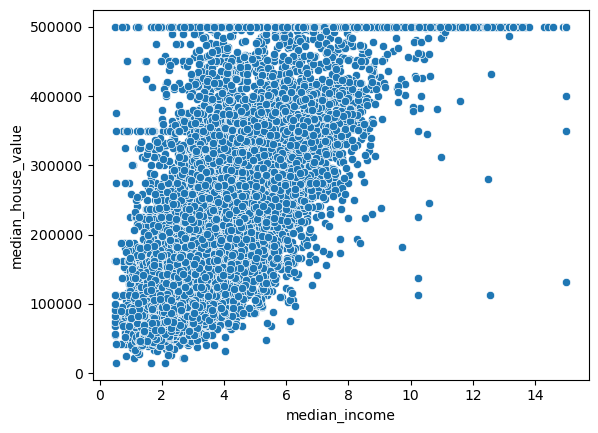

In [17]:
# Vi tittar närmare på sambandet mellan medianinkomst och median house value.
sns.scatterplot(data=train_copy, x='median_income', y='median_house_value')

### Combining features

In [18]:
train_copy['bedrooms_per_rooms'] = train_copy['total_bedrooms']/train_copy['total_rooms']
train_copy['rooms_per_household'] = train_copy['total_rooms']/train_copy['households']

<Axes: >

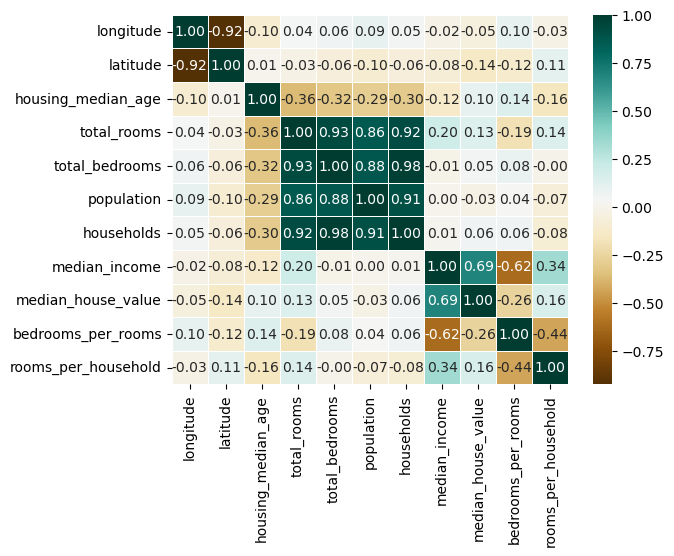

In [19]:
sns_Corr = train_copy.corr()
sns.heatmap(sns_Corr, annot=True, linewidth=.5, cmap = "BrBG", fmt=".2f")

#### Add the new features to train and test set

In [20]:
def combine_features(dataset):
    dataset['bedrooms_per_rooms'] = dataset['total_bedrooms']/dataset['total_rooms']
    dataset['rooms_per_household'] = dataset['total_rooms']/dataset['households']
    #features_to_drop = ['total_rooms', 'total_bedrooms']
    #dataset.drop(columns=features_to_drop, inplace=True)

    return dataset

In [21]:
train_set = combine_features(train_set)
test_set = combine_features(test_set)

In [22]:
train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,bedrooms_per_rooms,rooms_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754,207194.693738,0.212858,5.435235
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294,115622.626448,0.057995,2.387375
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.100000,0.888889
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700,119800.000000,0.175178,4.452055
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800,179850.000000,0.202808,5.235874
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175,265125.000000,0.239501,6.061037
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,141.909091


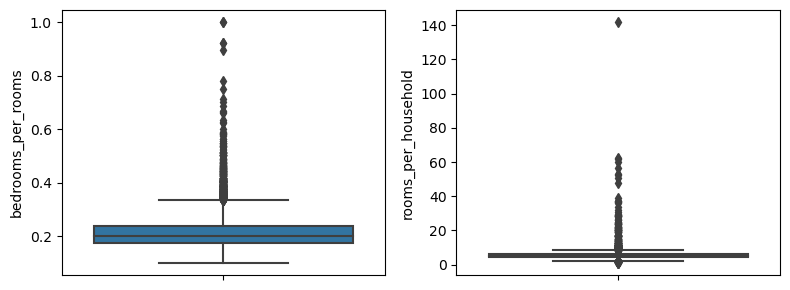

In [23]:
new_features = ['bedrooms_per_rooms', 'rooms_per_household']

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax = ax.flatten()

for i, column in enumerate(new_features):
    sns.boxplot(ax=ax[i], data=train_set, y=column)
    
plt.tight_layout()
plt.show()

### Split into x and y data

In [24]:
X_train = train_set.drop('median_house_value', axis=1)
y_train = train_set['median_house_value'].copy()
X_test = test_set.drop('median_house_value', axis=1)
y_test = test_set['median_house_value'].copy()

### Preprocessing pipeline

In [25]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

In [26]:
num_features = list(X_train.drop('ocean_proximity', axis=1))
cat_features = ["ocean_proximity"]

# From sklearn. onehotencoder documentation
# "However, dropping one category breaks the symmetry of the original representation and can therefore induce 
# a bias in downstream models, for instance for penalized linear classification or regression models.""

# One hot encoding
full_pipeline_onehot = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", OneHotEncoder(), cat_features)
])

# Dummy variable encoding
full_pipeline_onehotdrop = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", OneHotEncoder(drop='first', sparse_output=False), cat_features)
])

In [27]:
X_train_transf_onehot = full_pipeline_onehot.fit_transform(X_train)
X_train_transf_onehotdrop = full_pipeline_onehotdrop.fit_transform(X_train)

In [28]:
# Sanity check for scaling
print(np.median(X_train_transf_onehot))
print(np.median(X_train_transf_onehotdrop))

0.0
0.0


## Models

In [29]:
def print_rmse(name, scores):
    rmse = np.sqrt(-scores)
    print(f"{name}, Mean RMSE: {rmse.mean():.2f} SD: {rmse.std():.2f}")

In [30]:
# Initialisera modeller
lin_reg = LinearRegression()
lasso = Lasso(max_iter=5000)
ridge = Ridge(max_iter=5000)
elastic_net = ElasticNet(max_iter=5000)
lin_SVR = LinearSVR()
svr_poly = SVR(kernel='poly')
svr_rbf = SVR(kernel='rbf')
decision_tree_reg = DecisionTreeRegressor(random_state=42)
random_forest_reg = RandomForestRegressor(random_state=42)
knn = KNeighborsRegressor()

In [31]:
# Skapa ett dictionary med namn på varje modell samt själva modellen, för att enkelt kunna loopa över alla modeller 
# och printa information."
models = {
    'Lasso': lasso,
    'Ridge': ridge,
    'Elastic net': elastic_net,
    'Linear SVR': lin_SVR,
    'SVR poly': svr_poly,
    'SVR rbf': svr_rbf,
    'Decison tree regressor': decision_tree_reg,
    'Random forest regressor': random_forest_reg,
    'K Nearest Neighbour regressor': knn
}

#### Model evaluation

In [32]:
scores = cross_val_score(lin_reg, X_train_transf_onehotdrop, y_train, scoring='neg_mean_squared_error')
print_rmse("Linear Regression", scores)
for name, model in models.items():
    scores = cross_val_score(model, X_train_transf_onehot, y_train, scoring='neg_mean_squared_error')
    print_rmse(name, scores)

Linear Regression, Mean RMSE: 67803.18 SD: 1591.58
Lasso, Mean RMSE: 67803.18 SD: 1591.17
Ridge, Mean RMSE: 67802.25 SD: 1591.27
Elastic net, Mean RMSE: 80806.85 SD: 1119.34
Linear SVR, Mean RMSE: 215504.77 SD: 2044.99
SVR poly, Mean RMSE: 118707.75 SD: 1221.52
SVR rbf, Mean RMSE: 118465.32 SD: 1616.93
Decison tree regressor, Mean RMSE: 70806.41 SD: 1641.67
Random forest regressor, Mean RMSE: 49880.43 SD: 380.02
K Nearest Neighbour regressor, Mean RMSE: 63220.48 SD: 1413.94


### Feature selection

In [33]:
# För att enkelt kunna göra en feature selection väljer jag att göra om setet till en pandas df igen. 
# På så sätt kan jag smidigt se varje variabelnamn.
feature_names = num_features
for name, transformer, features in full_pipeline_onehot.transformers_:
    if name == 'cat':
        feature_names.extend(transformer.get_feature_names_out())
feature_names
X_train_transf_onehot_df = pd.DataFrame(X_train_transf_onehot, columns=feature_names)

In [34]:
random_forest_reg.fit(X_train_transf_onehot_df, y_train)
feature_importance = random_forest_reg.feature_importances_

In [35]:
feature_importance_df = pd.DataFrame({
    "Feature": X_train_transf_onehot_df.columns,
    "Importance": feature_importance
})

In [36]:
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
print(feature_importance_df)

                       Feature  Importance
7                median_income    0.484385
11      ocean_proximity_INLAND    0.140902
0                    longitude    0.095541
1                     latitude    0.086104
2           housing_median_age    0.048263
8           bedrooms_per_rooms    0.035827
9          rooms_per_household    0.027427
5                   population    0.023614
4               total_bedrooms    0.017144
3                  total_rooms    0.016672
6                   households    0.013653
14  ocean_proximity_NEAR OCEAN    0.006124
10   ocean_proximity_<1H OCEAN    0.003388
13    ocean_proximity_NEAR BAY    0.000826
12      ocean_proximity_ISLAND    0.000130


In [37]:
top_eight_features = feature_importance_df["Feature"].head(8).tolist()
top_eight_features

['median_income',
 'ocean_proximity_INLAND',
 'longitude',
 'latitude',
 'housing_median_age',
 'bedrooms_per_rooms',
 'rooms_per_household',
 'population']

In [38]:
X_train_top_eight = X_train_transf_onehot_df[top_eight_features]
X_train_top_eight.head(2)

,median_income,ocean_proximity_INLAND,longitude,latitude,housing_median_age,bedrooms_per_rooms,rooms_per_household,population
0,-0.129709,0.0,0.389474,-0.408971,0.210526,-0.034697,-0.135624,1.209178
1,0.120872,0.0,0.092105,-0.129288,1.052632,0.464757,-0.473796,0.156884


In [39]:
eight_scores = cross_val_score(random_forest_reg, X_train_top_eight, y_train, scoring='neg_mean_squared_error')
print_rmse("Random forest regressor with top eight features", eight_scores)

Random forest regressor with top eight features, Mean RMSE: 50221.24 SD: 333.66


In [40]:
# Top 11 features
top_eleven_features = feature_importance_df["Feature"].head(11).tolist()
X_train_top_eleven = X_train_transf_onehot_df[top_eleven_features]
eleven_scores = cross_val_score(random_forest_reg, X_train_top_eleven, y_train, scoring='neg_mean_squared_error')
print_rmse("Random forest regressor with top eleven features", eleven_scores)

Random forest regressor with top eleven features, Mean RMSE: 49986.73 SD: 503.74


### Finetuning the hyperparameters of Random Forest Regressor

In [41]:
param_grid = [
        {'n_estimators': [3, 10, 30, 100, 200], 
         'max_depth': [None, 10, 20, 30],
         'min_samples_leaf': [1, 2, 4],
         'max_features': [1, 2, 3, 4] 
        }]

grid_search = GridSearchCV(random_forest_reg, param_grid, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train_transf_onehot, y_train)
grid_search.best_params_

{'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 1,
 'n_estimators': 200}

### Evaluate chosen model on test set

In [42]:
X_test_transf = full_pipeline_onehot.transform(X_test)

In [62]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test_transf)
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
#final_rmse = np.sqrt(final_mse)
final_rmse

50281.11188475244

In [65]:
#Jämför RMSE med beroende variabeln, dvs median house value
print(f"Mean y test: {y_test.mean():.2f}")
print(f"Min: {y_test.min()}")
print(f"Max: {y_test.max()}")
print(f"RMSE, percentage of y: {final_rmse/y_test.mean():.2f}")

Mean y test: 205500.31
Min: 14999.0
Max: 500001.0
RMSE, percentage of y: 0.24


In [44]:
# Save models
#joblib.dump(my_model, 'my_model.pkl')
# my_model_loaded = joblib.load('my_model.pkl')